# __Impact Analysis of Monkeypox Case Study__

## **Business Understanding**

**The Monkeypox outbreak**, though not as widespread as other pandemics, poses significant public health challenges globally, especially in regions where the virus is most prevalent. As governments and health organizations strive to contain the spread, there is a need to **analyze Monkeypox data to extract actionable insights** that can aid in **public health responses and policy formation**. The objective of this project is to analyze global Monkeypox data, particularly focusing on regional trends, severity, and demographic impacts to support **strategic interventions**. The key aspects of this analysis will include:

1. **Epidemiologic Trends**: Investigating the spread of Monkeypox across different regions, focusing on factors such as new cases, total cases, and mortality rates.

2. **Regional Comparisons**: Comparing various countries and regions to understand how Monkeypox affects different areas, identifying regions with high transmission and high mortality rates.

3. **Demographic Trends**: Analyzing the impact of Monkeypox based on available demographic data (e.g., population or regions) to highlight vulnerable groups or areas requiring urgent attention.

4. **Temporal Analysis**: Examining how the outbreak has evolved over time, identifying any patterns or spikes in infections and deaths that could guide future preventive measures.

5. **Identification of High-risk Regions**: Identifying "hotspots" can support public health officials in prioritizing these areas for immediate attention and interventions.

<!-- ### **Problem Points**

Meskipun Monkeypox tidak sepopuler pandemi lainnya, penyebarannya tetap menimbulkan tantangan signifikan bagi kesehatan masyarakat global, terutama di negara-negara di mana virus ini lebih dominan. Beberapa masalah utama yang perlu dianalisis dari data ini adalah:

1. Identifikasi Tren Penyebaran: Bagaimana Monkeypox menyebar di berbagai wilayah dan negara? Adakah wilayah yang lebih rentan terhadap penyebaran ini?
2. Korelasi antara Kasus dan Kematian: Apakah ada hubungan yang signifikan antara jumlah kasus baru dengan angka kematian di setiap negara?
3. Perbandingan Regional: Negara atau wilayah mana yang memiliki jumlah kasus dan kematian tertinggi, serta bagaimana hal ini berkembang dari waktu ke waktu?
4. Analisis Temporal: Apakah terdapat pola atau lonjakan dalam penyebaran Monkeypox berdasarkan waktu, misalnya pada musim tertentu atau periode waktu tertentu dalam satu tahun?
5. Analisis Rasio Fatalitas Kasus: Wilayah mana yang memiliki rasio fatalitas kasus (Case Fatality Ratio) tertinggi? Apakah wilayah-wilayah ini juga memiliki jumlah kasus tinggi atau lebih sedikit namun dengan tingkat kematian yang lebih tinggi? -->

### **Problem Points**

Although Monkeypox is not as popular as other pandemics, its spread still poses significant challenges to global public health, especially in countries where the virus is more prevalent. Some of the key issues that need to be analyzed from this data are:

1. Identification of Spread Trends: How is Monkeypox spreading in different regions and countries? Are there regions that are more susceptible to this spread?
2. Correlation between Cases and Deaths: Is there a significant relationship between the number of new cases and the number of deaths in each country?
3. Regional Comparison: Which countries or regions have the highest number of cases and deaths, and how has this evolved over time?
4. Temporal Analysis: Are there any patterns or spikes in the spread of Monkeypox based on time of day, e.g. in certain seasons or certain time periods of the year?
5. Case Fatality Ratio Analysis: Which regions have the highest case fatality ratios? Do these regions also have a high number of cases or fewer but higher fatality rates?


## **Data Understanding**

<!-- **Data Description**

1. location: The name of the country or region that reported the data.
2. date: The date the data was reported in YYYY-MM-DD format.
3. new_cases: The number of new cases of Monkeypox reported on that date in the country/region.
4. new_deaths: The number of new deaths reported on that date in a country/region.
5. total_cases: The cumulative number of Monkeypox cases recorded in a country/region up to that date.
6. total_deaths: The cumulative number of deaths recorded in a country/region up to that date.
7. new_cases_per_million: The number of new cases per one million population in the region as of the given date.
8. total_cases_per_million: The cumulative number of cases per one million population up to the given date.
9. new_deaths_per_million: The number of new deaths per one million population in the region as of the given date.
10. total_deaths_per_million: The cumulative number of deaths per one million population up to the given date.
11. new_cases_smoothed: The smoothed average daily number of new cases over the given time period.
12. new_deaths_smoothed: The smoothed average daily number of new deaths over the given time period.
13. new_cases_smoothed_per_million: Average daily smoothed number of new cases per one million population.
14. new_deaths_smoothed_per_million: Rata-rata jumlah kematian baru harian yang dihaluskan per satu juta penduduk.
15. suspected_cases_cumulative: Jumlah kasus Monkeypox yang dicurigai hingga tanggal tertentu (jika data tersedia).
16. annotation: Catatan tambahan atau informasi terkait laporan data pada tanggal tertentu (misalnya, revisi atau koreksi data).

**Data Grouping**

1. Total Kasus dan Kematian per Negara/Wilayah: Menghitung jumlah total kasus dan kematian Monkeypox di setiap negara atau wilayah.
2. Perkembangan Kasus per Hari: Mengelompokkan data berdasarkan tanggal untuk melihat tren penyebaran harian.
3. Distribusi Kasus Baru per Wilayah: Melihat distribusi kasus baru berdasarkan lokasi dan waktu untuk memahami wilayah yang terkena dampak paling parah dalam periode tertentu.
4. Analisis Rasio Fatalitas Kasus (Case Fatality Ratio): Menghitung rasio fatalitas kasus (CFR) sebagai jumlah total kematian dibagi jumlah total kasus di setiap negara/wilayah untuk mengidentifikasi wilayah dengan tingkat fatalitas yang tinggi. -->

**Data Description**

1. location: The name of the country or region that reported the data.
2. date: The date the data was reported in YYYY-MM-DD format.
3. new_cases: The number of new cases of Monkeypox reported on that date in the country/region.
4. new_deaths: The number of new deaths reported on that date in a country/region.
5. total_cases: The cumulative number of Monkeypox cases recorded in a country/region up to that date.
6. total_deaths: The cumulative number of deaths recorded in a country/region up to that date.
7. new_cases_per_million: The number of new cases per one million population in the region as of the given date.
8. total_cases_per_million: The cumulative number of cases per one million population up to the given date.
9. new_deaths_per_million: The number of new deaths per one million population in the region as of the given date.
10. total_deaths_per_million: The cumulative number of deaths per one million population up to the given date.
11. new_cases_smoothed: The smoothed average daily number of new cases over the given time period.
12. new_deaths_smoothed: The smoothed average daily number of new deaths over the given time period.
13. new_cases_smoothed_per_million: Average daily smoothed number of new cases per one million population.
14. new_deaths_smoothed_per_million: Average daily smoothed number of new deaths per one million population.
15. suspected_cases_cumulative: Number of suspected Monkeypox cases up to a certain date (if data is available).
16. annotation: Additional notes or information related to the data report on a specific date (for example, data revisions or corrections).

**Data Grouping**

1. Total Cases and Deaths per Country/Region: Counts the total number of Monkeypox cases and deaths in each country or region.
2. Case Progression by Day: Categorize the data by date to see the trend of daily spread.
3. Distribution of New Cases by Region: View the distribution of new cases by location and time to understand the most severely affected regions in a given period.
4. Case Fatality Ratio Analysis: Calculate the case fatality ratio (CFR) as the total number of deaths divided by the total number of cases in each country/region to identify areas with high fatality rates.

## **Data Preparation**

### Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Gathering Data (Import File)

In [101]:
# Load the dataset
file_path = 'data/monkeypox.csv'
df = pd.read_csv(file_path)

C:\Users\Ryan\AppData\Local\Temp\ipykernel_18460\3565732252.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [102]:
# Convert 'date' column to datetime for easier analysis
df['date'] = pd.to_datetime(df['date'])

In [103]:
# Preview the dataset
df.head()

,location,date,iso_code,total_cases,total_deaths,new_cases,new_deaths,new_cases_smoothed,new_deaths_smoothed,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million,suspected_cases_cumulative,annotation
0,Africa,2022-05-01,OWID_AFR,42.0,2.0,2.0,0.0,0.29,0.0,0.001,0.03,0.0,0.0,0.00141,0.0,NaN,NaN
1,Africa,2022-05-02,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.03,0.0,0.0,0.00141,0.0,NaN,NaN
2,Africa,2022-05-03,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.03,0.0,0.0,0.00141,0.0,NaN,NaN
3,Africa,2022-05-04,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.03,0.0,0.0,0.00141,0.0,NaN,NaN
4,Africa,2022-05-05,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.03,0.0,0.0,0.00141,0.0,NaN,NaN


In [104]:
# Summary statistics for initial understanding
summary = df.describe()
summary

,date,total_cases,total_deaths,new_cases,new_deaths,new_cases_smoothed,new_deaths_smoothed,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million,suspected_cases_cumulative
count,90058,90051.000000,90051.000000,90051.000000,90051.000000,90051.000000,90051.000000,90051.000000,90051.000000,90051.000000,90051.000000,90051.000000,90051.000000,63.000000
mean,2023-07-27 02:55:10.986252800,2312.409657,4.292878,3.575341,0.007729,3.558704,0.007705,0.032791,21.775521,0.032339,0.000053,0.027869,0.000053,9399.015873
min,2022-05-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,2023-01-07 00:00:00,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.119000,0.000000,0.000000,0.000000,0.000000,151.500000
50%,2023-07-29 00:00:00,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.765000,0.000000,0.000000,0.000000,0.000000,935.000000
75%,2024-02-15 00:00:00,328.000000,1.000000,0.000000,0.000000,0.140000,0.000000,0.000000,31.633500,0.001000,0.000000,0.000700,0.000000,18800.000000
max,2024-09-23 00:00:00,107363.000000,234.000000,5697.000000,11.000000,1131.570000,2.000000,91.804000,183.591000,17.443000,0.224530,0.664820,0.031430,33653.000000
std,NaN,9858.145251,19.230875,70.166005,0.166641,31.450270,0.065911,0.583941,32.237447,0.243480,0.002073,0.076448,0.000770,11145.817951


### Check Data

In [105]:
# Count rows of dataset
jumlah_data = len(df)
print("Total data:", jumlah_data)

Total data: 90058


In [106]:
# View the first 5 rows of the dataset
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,location,date,iso_code,total_cases,total_deaths,new_cases,new_deaths,new_cases_smoothed,new_deaths_smoothed,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million,suspected_cases_cumulative,annotation
0,Africa,2022-05-01,OWID_AFR,42.0,2.0,2.0,0.0,0.29,0.0,0.001,0.03,0.0,0.0,0.00141,0.0,NaN,NaN
1,Africa,2022-05-02,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.03,0.0,0.0,0.00141,0.0,NaN,NaN
2,Africa,2022-05-03,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.03,0.0,0.0,0.00141,0.0,NaN,NaN
3,Africa,2022-05-04,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.03,0.0,0.0,0.00141,0.0,NaN,NaN
4,Africa,2022-05-05,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.03,0.0,0.0,0.00141,0.0,NaN,NaN


### Assessing Data

In [107]:
# Counting the number of duplicate entries
# Counting the number of null values in each column
print("Number of duplications: ", df.duplicated().sum())
print("\n")

print("Null Data:")
for key, data in df.isnull().sum().items():
    print(f"{key}: {data}")

Number of duplications:  0


Null Data:
location: 0
date: 0
iso_code: 877
total_cases: 7
total_deaths: 7
new_cases: 7
new_deaths: 7
new_cases_smoothed: 7
new_deaths_smoothed: 7
new_cases_per_million: 7
total_cases_per_million: 7
new_cases_smoothed_per_million: 7
new_deaths_per_million: 7
total_deaths_per_million: 7
new_deaths_smoothed_per_million: 7
suspected_cases_cumulative: 89995
annotation: 89188


In [108]:
# Checking dataset dimensions (number of rows and columns)
print("\nShape of the dataset:")
df.shape


Shape of the dataset:


(90058, 17)

In [109]:
# Checking data type, column, and missing values information
print("\nInfo of the dataset:")
df.info()


Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90058 entries, 0 to 90057
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   location                         90058 non-null  object        
 1   date                             90058 non-null  datetime64[ns]
 2   iso_code                         89181 non-null  object        
 3   total_cases                      90051 non-null  float64       
 4   total_deaths                     90051 non-null  float64       
 5   new_cases                        90051 non-null  float64       
 6   new_deaths                       90051 non-null  float64       
 7   new_cases_smoothed               90051 non-null  float64       
 8   new_deaths_smoothed              90051 non-null  float64       
 9   new_cases_per_million            90051 non-null  float64       
 10  total_cases_per_million          900

In [110]:
# View basic statistical descriptions for numeric columns
print("\nStatistical description of numerical columns:")
df.describe()


Statistical description of numerical columns:


,date,total_cases,total_deaths,new_cases,new_deaths,new_cases_smoothed,new_deaths_smoothed,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million,suspected_cases_cumulative
count,90058,90051.000000,90051.000000,90051.000000,90051.000000,90051.000000,90051.000000,90051.000000,90051.000000,90051.000000,90051.000000,90051.000000,90051.000000,63.000000
mean,2023-07-27 02:55:10.986252800,2312.409657,4.292878,3.575341,0.007729,3.558704,0.007705,0.032791,21.775521,0.032339,0.000053,0.027869,0.000053,9399.015873
min,2022-05-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,2023-01-07 00:00:00,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.119000,0.000000,0.000000,0.000000,0.000000,151.500000
50%,2023-07-29 00:00:00,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.765000,0.000000,0.000000,0.000000,0.000000,935.000000
75%,2024-02-15 00:00:00,328.000000,1.000000,0.000000,0.000000,0.140000,0.000000,0.000000,31.633500,0.001000,0.000000,0.000700,0.000000,18800.000000
max,2024-09-23 00:00:00,107363.000000,234.000000,5697.000000,11.000000,1131.570000,2.000000,91.804000,183.591000,17.443000,0.224530,0.664820,0.031430,33653.000000
std,NaN,9858.145251,19.230875,70.166005,0.166641,31.450270,0.065911,0.583941,32.237447,0.243480,0.002073,0.076448,0.000770,11145.817951


In [111]:
# Checking the number of missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
location                               0
date                                   0
iso_code                             877
total_cases                            7
total_deaths                           7
new_cases                              7
new_deaths                             7
new_cases_smoothed                     7
new_deaths_smoothed                    7
new_cases_per_million                  7
total_cases_per_million                7
new_cases_smoothed_per_million         7
new_deaths_per_million                 7
total_deaths_per_million               7
new_deaths_smoothed_per_million        7
suspected_cases_cumulative         89995
annotation                         89188
dtype: int64


### Cleaning Data

In [112]:
# Convert the 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Checking failed data converted to datetime
invalid_dates = df[df['date'].isna()]
print("\nInvalid date entries (rows with missing dates after conversion):")
print(invalid_dates)


Invalid date entries (rows with missing dates after conversion):
Empty DataFrame
Columns: [location, date, iso_code, total_cases, total_deaths, new_cases, new_deaths, new_cases_smoothed, new_deaths_smoothed, new_cases_per_million, total_cases_per_million, new_cases_smoothed_per_million, new_deaths_per_million, total_deaths_per_million, new_deaths_smoothed_per_million, suspected_cases_cumulative, annotation]
Index: []


In [113]:
# Addressing missing values
# For rows that contain missing values in the new_cases, new_deaths, total_cases, or total_deaths columns, we will remove them
data_cleaned = df.dropna(subset=['new_cases', 'new_deaths', 'total_cases', 'total_deaths'])

# Verify that there are no more missing values
print("\nMissing values after cleaning:")
print(data_cleaned.isnull().sum())


Missing values after cleaning:
location                               0
date                                   0
iso_code                             870
total_cases                            0
total_deaths                           0
new_cases                              0
new_deaths                             0
new_cases_smoothed                     0
new_deaths_smoothed                    0
new_cases_per_million                  0
total_cases_per_million                0
new_cases_smoothed_per_million         0
new_deaths_per_million                 0
total_deaths_per_million               0
new_deaths_smoothed_per_million        0
suspected_cases_cumulative         89995
annotation                         89182
dtype: int64


In [114]:
# Checking if there are duplicate values
duplicates = data_cleaned.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# If there are duplicates, we will remove them
if duplicates > 0:
    data_cleaned = data_cleaned.drop_duplicates()

# Verify the data dimension after cleaning
print(f"\nShape of the dataset after cleaning: {data_cleaned.shape}")


Number of duplicate rows: 0

Shape of the dataset after cleaning: (90051, 17)


In [115]:
# Checking for strange or out-of-bounds values (e.g. negative cases)
negative_cases = data_cleaned[(data_cleaned['new_cases'] < 0) | (data_cleaned['new_deaths'] < 0)]
print("\nRows with negative case values (if any):")
print(negative_cases)

# If there are invalid negative values, they can be removed
data_cleaned = data_cleaned[(data_cleaned['new_cases'] >= 0) & (data_cleaned['new_deaths'] >= 0)]


Rows with negative case values (if any):
Empty DataFrame
Columns: [location, date, iso_code, total_cases, total_deaths, new_cases, new_deaths, new_cases_smoothed, new_deaths_smoothed, new_cases_per_million, total_cases_per_million, new_cases_smoothed_per_million, new_deaths_per_million, total_deaths_per_million, new_deaths_smoothed_per_million, suspected_cases_cumulative, annotation]
Index: []


In [116]:
# Checking for outliers in the new_cases and total_cases columns with IQR
Q1 = data_cleaned['new_cases'].quantile(0.25)
Q3 = data_cleaned['new_cases'].quantile(0.75)
IQR = Q3 - Q1

outliers = data_cleaned[(data_cleaned['new_cases'] < (Q1 - 1.5 * IQR)) | (data_cleaned['new_cases'] > (Q3 + 1.5 * IQR))]
print("\nPotential outliers based on new_cases:")
outliers


Potential outliers based on new_cases:


,location,date,iso_code,total_cases,total_deaths,new_cases,new_deaths,new_cases_smoothed,new_deaths_smoothed,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million,suspected_cases_cumulative,annotation
0,Africa,2022-05-01,OWID_AFR,42.0,2.0,2.0,0.0,0.29,0.00,0.001,0.030,0.000,0.0000,0.00141,0.0000,NaN,NaN
14,Africa,2022-05-15,OWID_AFR,46.0,2.0,4.0,0.0,0.57,0.00,0.003,0.032,0.000,0.0000,0.00141,0.0000,NaN,NaN
21,Africa,2022-05-22,OWID_AFR,58.0,2.0,12.0,0.0,1.71,0.00,0.008,0.041,0.001,0.0000,0.00141,0.0000,NaN,NaN
32,Africa,2022-06-02,OWID_AFR,59.0,2.0,1.0,0.0,0.14,0.00,0.001,0.041,0.000,0.0000,0.00140,0.0000,NaN,NaN
35,Africa,2022-06-05,OWID_AFR,77.0,3.0,18.0,1.0,2.71,0.14,0.013,0.054,0.002,0.0007,0.00211,0.0001,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90043,World,2024-09-02,NaN,106730.0,234.0,1.0,0.0,131.86,0.00,0.000,13.126,0.016,0.0000,0.02878,0.0000,NaN,NaN
90044,World,2024-09-03,NaN,106732.0,234.0,2.0,0.0,129.14,0.00,0.000,13.125,0.016,0.0000,0.02878,0.0000,NaN,NaN
90049,World,2024-09-08,NaN,106964.0,234.0,232.0,0.0,33.57,0.00,0.029,13.152,0.004,0.0000,0.02877,0.0000,NaN,NaN
90053,World,2024-09-12,NaN,106965.0,234.0,1.0,0.0,33.29,0.00,0.000,13.151,0.004,0.0000,0.02877,0.0000,NaN,NaN


In [117]:
# showing the entire of dataset
print("\nCleaned data preview:")
data_cleaned


Cleaned data preview:


,location,date,iso_code,total_cases,total_deaths,new_cases,new_deaths,new_cases_smoothed,new_deaths_smoothed,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million,suspected_cases_cumulative,annotation
0,Africa,2022-05-01,OWID_AFR,42.0,2.0,2.0,0.0,0.29,0.0,0.001,0.030,0.000,0.0,0.00141,0.0,NaN,NaN
1,Africa,2022-05-02,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.030,0.000,0.0,0.00141,0.0,NaN,NaN
2,Africa,2022-05-03,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.030,0.000,0.0,0.00141,0.0,NaN,NaN
3,Africa,2022-05-04,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.030,0.000,0.0,0.00141,0.0,NaN,NaN
4,Africa,2022-05-05,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.030,0.000,0.0,0.00141,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90053,World,2024-09-12,NaN,106965.0,234.0,1.0,0.0,33.29,0.0,0.000,13.151,0.004,0.0,0.02877,0.0,NaN,NaN
90054,World,2024-09-13,NaN,106965.0,234.0,0.0,0.0,33.29,0.0,0.000,13.151,0.004,0.0,0.02877,0.0,NaN,NaN
90055,World,2024-09-14,NaN,106965.0,234.0,0.0,0.0,33.29,0.0,0.000,13.151,0.004,0.0,0.02877,0.0,NaN,NaN
90056,World,2024-09-15,NaN,107363.0,234.0,398.0,0.0,57.00,0.0,0.049,13.199,0.007,0.0,0.02877,0.0,NaN,NaN


In [118]:
# Checking data type and column of dataset
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90051 entries, 0 to 90057
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   location                         90051 non-null  object        
 1   date                             90051 non-null  datetime64[ns]
 2   iso_code                         89181 non-null  object        
 3   total_cases                      90051 non-null  float64       
 4   total_deaths                     90051 non-null  float64       
 5   new_cases                        90051 non-null  float64       
 6   new_deaths                       90051 non-null  float64       
 7   new_cases_smoothed               90051 non-null  float64       
 8   new_deaths_smoothed              90051 non-null  float64       
 9   new_cases_per_million            90051 non-null  float64       
 10  total_cases_per_million          90051 non-null  float64       

## **Exploratory Data Analysis (EDA)**

In [119]:
# Classification of Countries and Regions/Continents
# List of regions/continents that are not countries
regions_or_continents = ['World', 'Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']  # You can add it if needed

# Added a new column 'location_type' to classify between 'Country' and 'Region/Continent'
data_cleaned['location_type'] = data_cleaned['location'].apply(lambda x: 'Region/Continent' if x in regions_or_continents else 'Country')

# Checking if the clustering was successful
print("\nLocation types (Countries vs Regions/Continents):")
print(data_cleaned['location_type'].value_counts())

# Grouping country and non-country data for separate analysis
countries_data = data_cleaned[data_cleaned['location_type'] == 'Country']
regions_data = data_cleaned[data_cleaned['location_type'] == 'Region/Continent']


Location types (Countries vs Regions/Continents):
location_type
Country             84025
Region/Continent     6026
Name: count, dtype: int64


In [120]:
# Optional: Displays the number of countries and regions identified
print(f"\nJumlah Negara: {countries_data['location'].nunique()}")
print(f"Jumlah Wilayah/Benua: {regions_data['location'].nunique()}")

# View the dataset after being classified between countries and non-countries
print("\nDataset yang diklasifikasikan:")
data_cleaned


Jumlah Negara: 123
Jumlah Wilayah/Benua: 7

Dataset yang diklasifikasikan:


,location,date,iso_code,total_cases,total_deaths,new_cases,new_deaths,new_cases_smoothed,new_deaths_smoothed,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million,suspected_cases_cumulative,annotation,location_type
0,Africa,2022-05-01,OWID_AFR,42.0,2.0,2.0,0.0,0.29,0.0,0.001,0.030,0.000,0.0,0.00141,0.0,NaN,NaN,Region/Continent
1,Africa,2022-05-02,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.030,0.000,0.0,0.00141,0.0,NaN,NaN,Region/Continent
2,Africa,2022-05-03,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.030,0.000,0.0,0.00141,0.0,NaN,NaN,Region/Continent
3,Africa,2022-05-04,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.030,0.000,0.0,0.00141,0.0,NaN,NaN,Region/Continent
4,Africa,2022-05-05,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.030,0.000,0.0,0.00141,0.0,NaN,NaN,Region/Continent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90053,World,2024-09-12,NaN,106965.0,234.0,1.0,0.0,33.29,0.0,0.000,13.151,0.004,0.0,0.02877,0.0,NaN,NaN,Region/Continent
90054,World,2024-09-13,NaN,106965.0,234.0,0.0,0.0,33.29,0.0,0.000,13.151,0.004,0.0,0.02877,0.0,NaN,NaN,Region/Continent
90055,World,2024-09-14,NaN,106965.0,234.0,0.0,0.0,33.29,0.0,0.000,13.151,0.004,0.0,0.02877,0.0,NaN,NaN,Region/Continent
90056,World,2024-09-15,NaN,107363.0,234.0,398.0,0.0,57.00,0.0,0.049,13.199,0.007,0.0,0.02877,0.0,NaN,NaN,Region/Continent


**Epidemiologic Trends: Investigating the Spread of Monkeypox**

Melihat tren penyebaran Monkeypox dengan fokus pada faktor kasus baru, total kasus, dan tingkat kematian.

In [121]:
# View the development of new cases and total cases over time for countries
data_grouped_by_date_countries = countries_data.groupby('date').agg({
    'new_cases': 'sum',
    'total_cases': 'sum',
    'new_deaths': 'sum',
    'total_deaths': 'sum'
}).reset_index()

**Regional Comparisons: Country/Region Comparisons**

Membandingkan negara-negara untuk memahami bagaimana Monkeypox mempengaruhi berbagai wilayah.

In [122]:
# View total cases and deaths in each country
data_grouped_by_location_countries = countries_data.groupby('location').agg({
    'total_cases': 'sum',
    'total_deaths': 'sum'
}).reset_index()

# View total cases and deaths in each region/continent
data_grouped_by_location_regions = regions_data.groupby('location').agg({
    'total_cases': 'sum',
    'total_deaths': 'sum'
}).reset_index()

**Demographic Trends: Impact by Region**

Menganalisis dampak Monkeypox berdasarkan jumlah populasi atau kawasan regional.

In [123]:
# A look at the countries with the highest total cases
top_countries = data_grouped_by_location_countries.nlargest(10, 'total_cases')

**Temporal Analysis: Time of Deployment Analysis**

Menganalisis bagaimana penyebaran Monkeypox berubah seiring waktu.

In [133]:
# Make sure the 'date' field is in datetime format
countries_data.loc[:, 'date'] = pd.to_datetime(countries_data['date'], errors='coerce')

# Create a 'month' column in Year-Month format
countries_data.loc[:, 'month'] = countries_data['date'].dt.strftime('%Y-%m')

# Convert the 'new_cases' and 'new_deaths' columns to numeric
countries_data.loc[:, 'new_cases'] = pd.to_numeric(countries_data['new_cases'], errors='coerce')
countries_data.loc[:, 'new_deaths'] = pd.to_numeric(countries_data['new_deaths'], errors='coerce')

# Group data by 'month' and calculate total new cases and deaths by month
cases_per_month_countries = countries_data.groupby('month').agg({
    'new_cases': 'sum',
    'new_deaths': 'sum'
}).reset_index()


**Identification of High-risk Regions: Top Locations by Case Fatality Ratio**

In [125]:
# Calculating CFR
data_grouped_by_location_countries['CFR'] = data_grouped_by_location_countries['total_deaths'] / data_grouped_by_location_countries['total_cases'] * 100  # dalam persen

# Identify areas with high CFR
high_cfr_locations = data_grouped_by_location_countries.nlargest(10, 'CFR')

## **Data Visualization**

**Epidemiologic Trends: Investigating the Spread of Monkeypox**

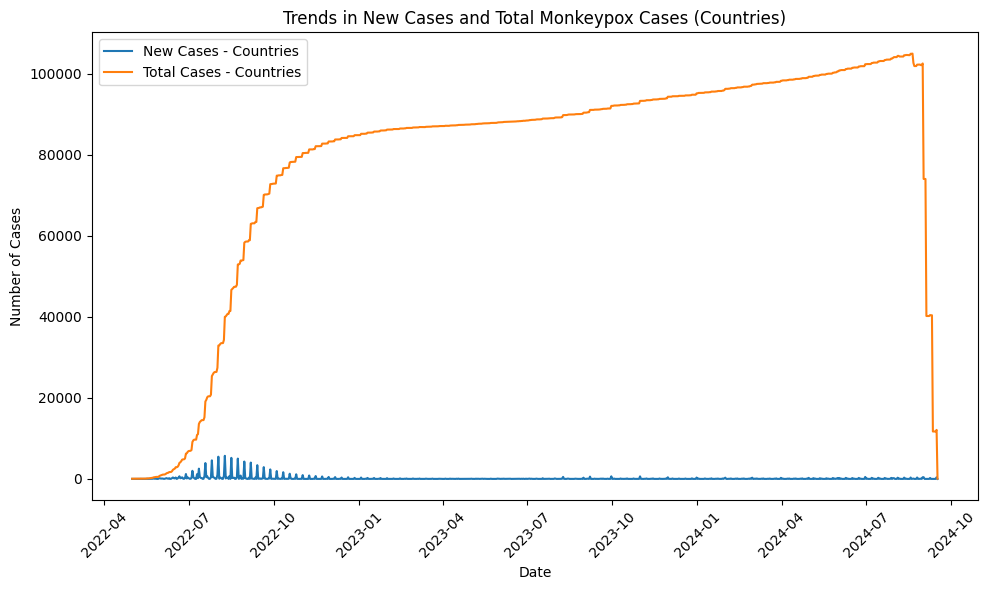

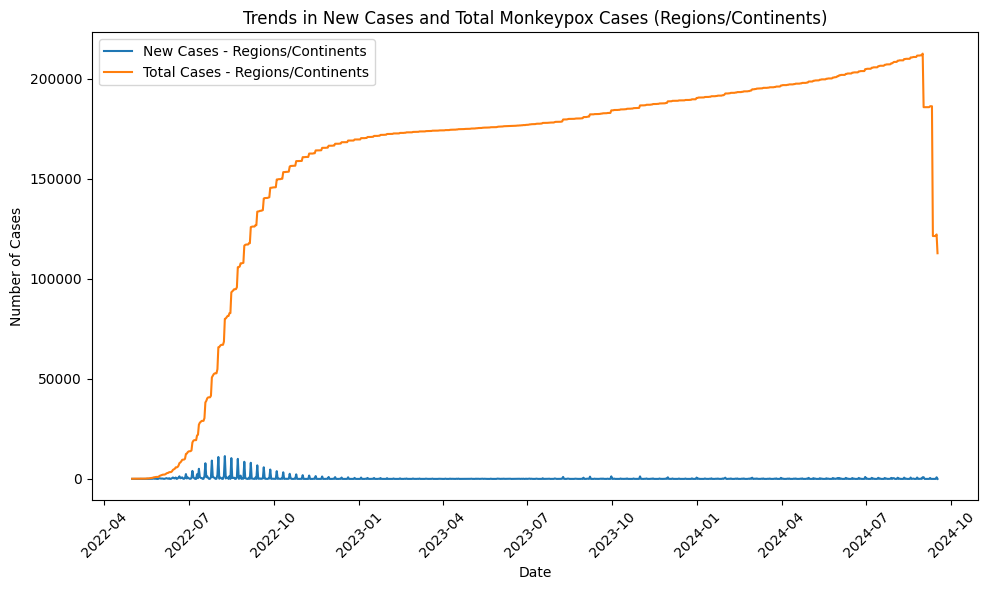

In [ ]:
# Visualize the trend of new cases and total cases over time (Country)
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='new_cases', data=data_grouped_by_date_countries, label='New Cases - Countries')
sns.lineplot(x='date', y='total_cases', data=data_grouped_by_date_countries, label='Total Cases - Countries')
plt.title('Trends in New Cases and Total Monkeypox Cases (Countries)')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# View the progression of new cases and total cases over time for regions/continents
data_grouped_by_date_regions = regions_data.groupby('date').agg({
    'new_cases': 'sum',
    'total_cases': 'sum',
    'new_deaths': 'sum',
    'total_deaths': 'sum'
}).reset_index()

# Visualize the trend of new cases and total cases over time (Region/Continent)
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='new_cases', data=data_grouped_by_date_regions, label='New Cases - Regions/Continents')
sns.lineplot(x='date', y='total_cases', data=data_grouped_by_date_regions, label='Total Cases - Regions/Continents')
plt.title('Trends in New Cases and Total Monkeypox Cases (Regions/Continents)')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Regional Comparisons: Country/Region Comparisons**

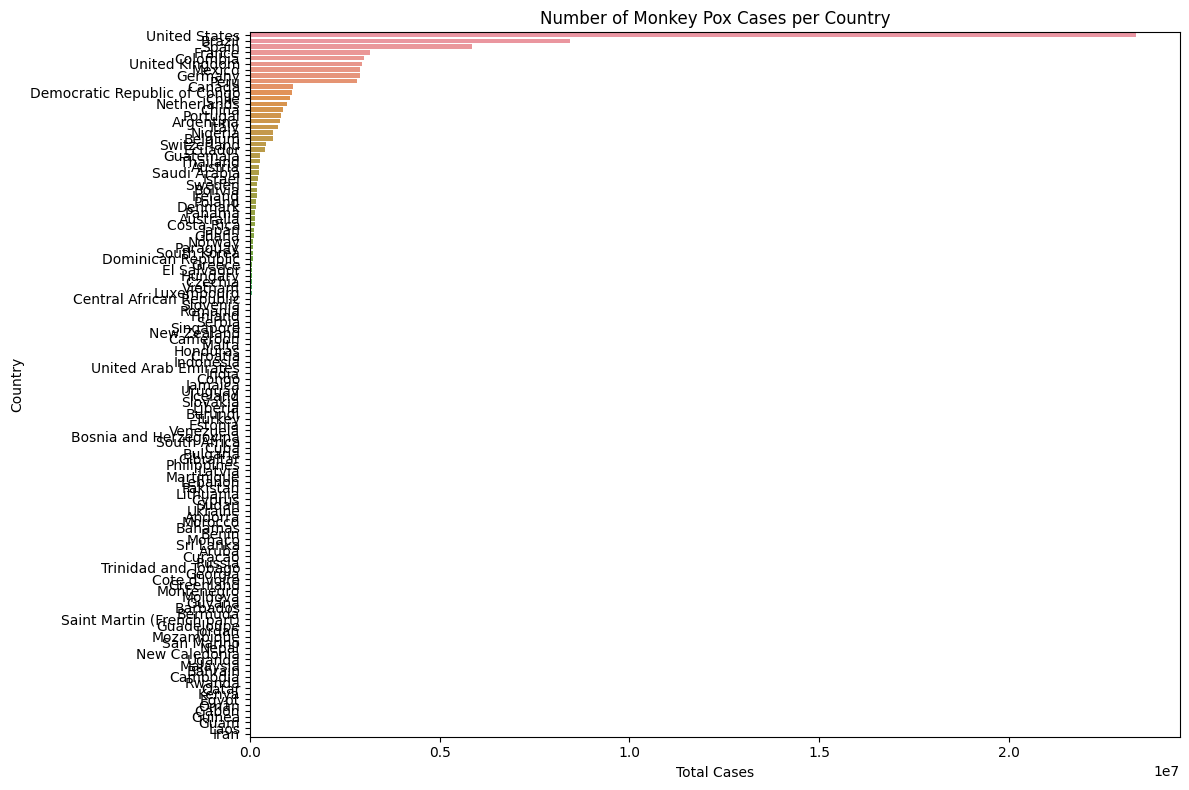

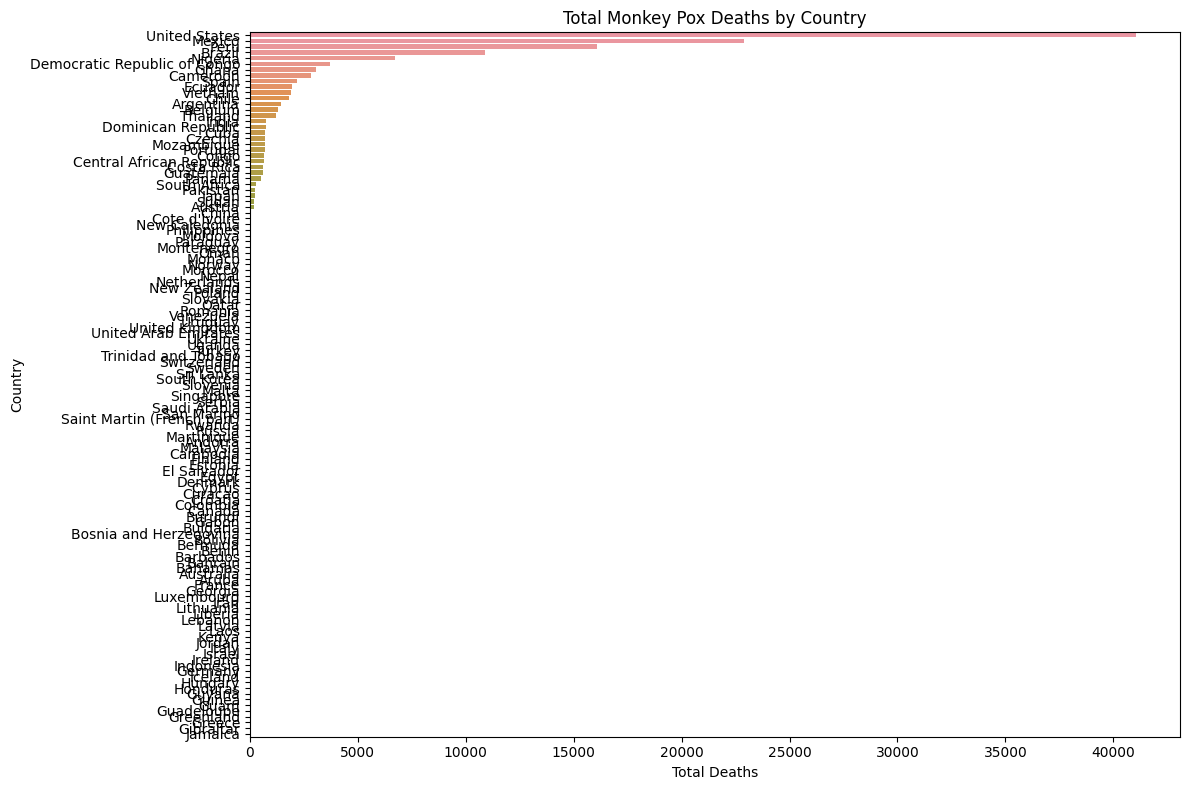

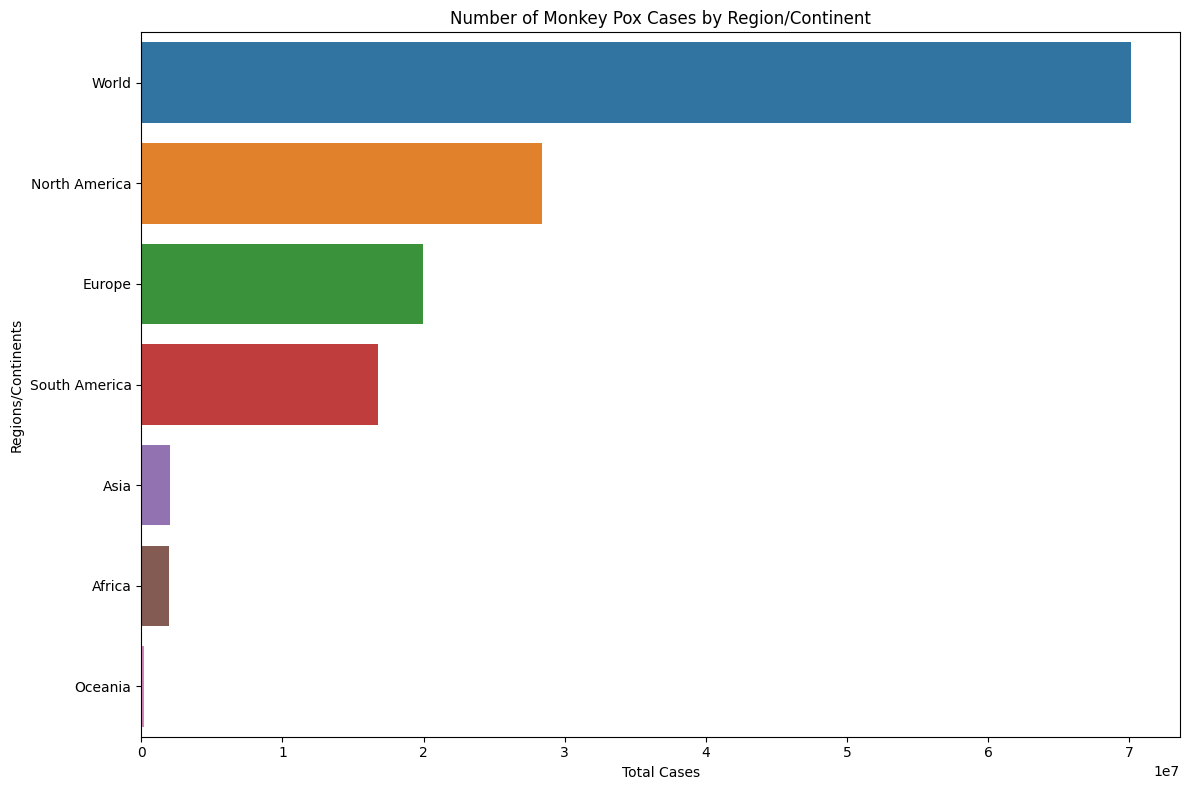

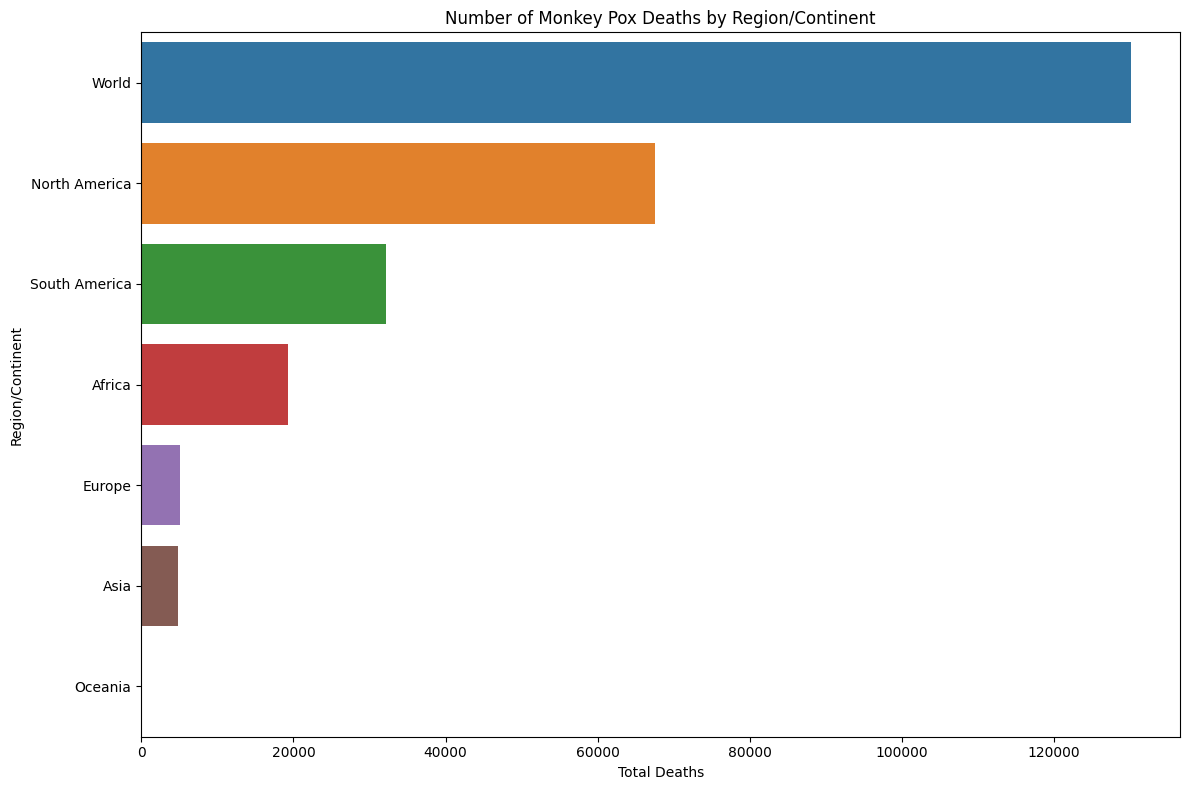

In [137]:
# Visualization: Total Cases per Country
plt.figure(figsize=(12, 8))
sns.barplot(x='total_cases', y='location', data=data_grouped_by_location_countries.sort_values('total_cases', ascending=False))
plt.title('Number of Monkey Pox Cases per Country')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# Visualization: Total Deaths per Country
plt.figure(figsize=(12, 8))
sns.barplot(x='total_deaths', y='location', data=data_grouped_by_location_countries.sort_values('total_deaths', ascending=False))
plt.title('Total Monkey Pox Deaths by Country')
plt.xlabel('Total Deaths')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# Visualization: Number of Cases and Deaths by Region/Continent
plt.figure(figsize=(12, 8))
sns.barplot(x='total_cases', y='location', data=data_grouped_by_location_regions.sort_values('total_cases', ascending=False))
plt.title('Number of Monkey Pox Cases by Region/Continent')
plt.xlabel('Total Cases')
plt.ylabel('Regions/Continents')
plt.tight_layout()
plt.show()

# Visualization: Total Cases and Deaths by Region/Continent
plt.figure(figsize=(12, 8))
sns.barplot(x='total_deaths', y='location', data=data_grouped_by_location_regions.sort_values('total_deaths', ascending=False))
plt.title('Number of Monkey Pox Deaths by Region/Continent')
plt.xlabel('Total Deaths')
plt.ylabel('Region/Continent')
plt.tight_layout()
plt.show()

**Demographic Trends: Impact by Region**

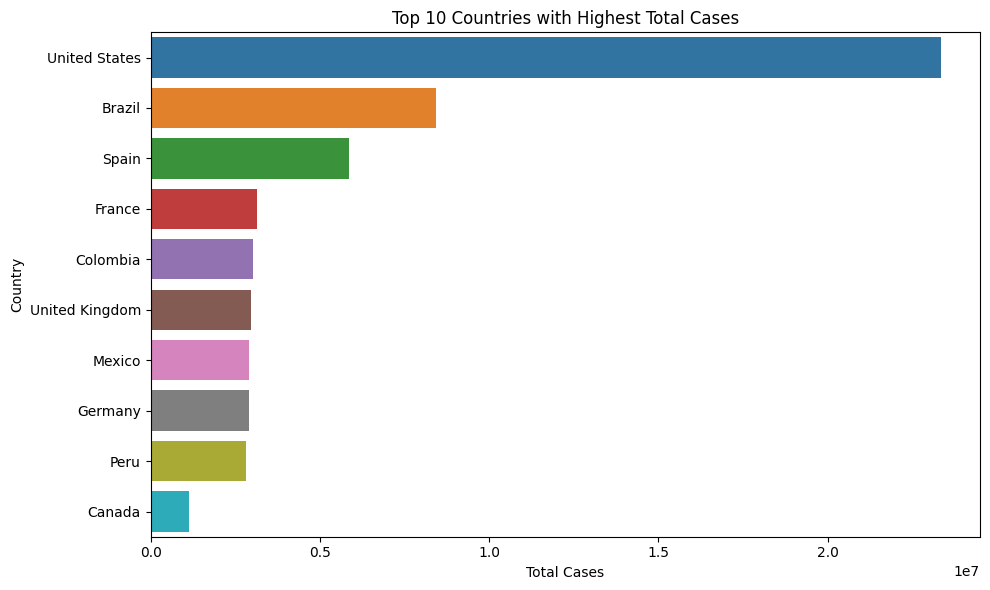

In [138]:
# Visualization: Countries with the Highest Total Cases
plt.figure(figsize=(10, 6))
sns.barplot(x='total_cases', y='location', data=top_countries)
plt.title('Top 10 Countries with Highest Total Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

**Temporal Analysis: Time of Deployment Analysis**

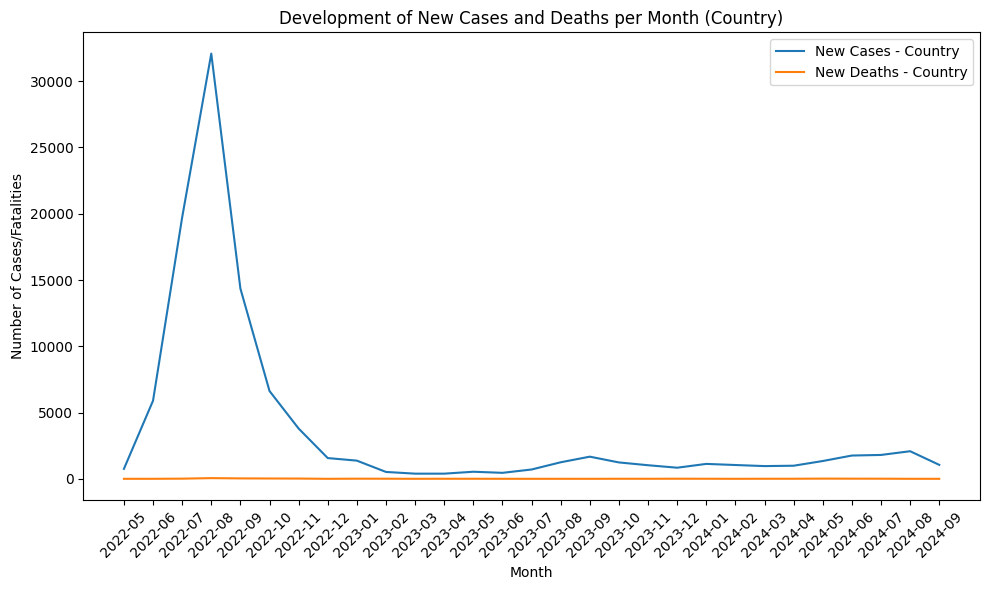

In [139]:
# Visualization: New Case Development by Month
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='new_cases', data=cases_per_month_countries, label='New Cases - Country')
sns.lineplot(x='month', y='new_deaths', data=cases_per_month_countries, label='New Deaths - Country')
plt.title('Development of New Cases and Deaths per Month (Country)')
plt.xlabel('Month')
plt.ylabel('Number of Cases/Fatalities')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**Identification of High-risk Regions: Top Locations by Case Fatality Ratio**

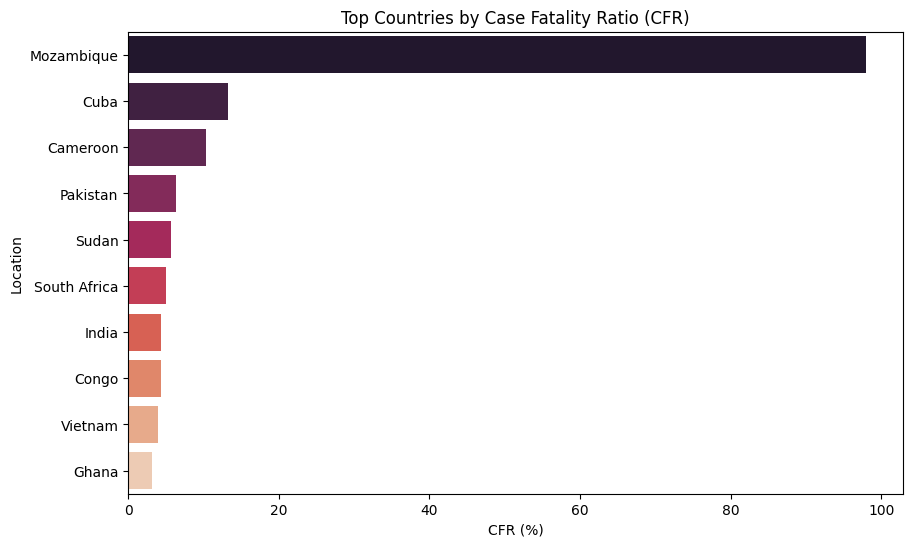

In [140]:
# CFR visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='CFR', y='location', data=high_cfr_locations, palette='rocket')
plt.title('Top Countries by Case Fatality Ratio (CFR)')
plt.xlabel('CFR (%)')
plt.ylabel('Location')
plt.show()

## **Export to File**

In [131]:
# Path to save the modified CSV file
file_name = input("Enter the file name to save (without the .csv extension): ")

In [132]:
# Path to save the modified CSV file
output_file_path = f'{file_name}.csv'

# The function of the .to_csv function is to save the data into a file with the .csv extension
data_cleaned.to_csv(output_file_path)

print(f"The file has been saved to: {output_file_path}")

The file has been saved to: monkeypox_processed.csv
